# Uber Trips Analysis 

### Importing the necessary Python libraries and the dataset.
1) Numpy & Pandas used for Data Manipulation and Numerical Calculations.

In [1]:
import pandas as pd
import numpy as np 

In [2]:
u = pd.read_csv(r"C:\PYTHON NOTES\Python Projects\Data Sates\uber-raw-data-sep14.csv")
u

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [3]:
u.shape


(1028136, 4)

In [4]:
u.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [5]:
u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [6]:
u['Date/Time']= pd.to_datetime(u['Date/Time'])

In [7]:
u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date/Time  1028136 non-null  datetime64[ns]
 1   Lat        1028136 non-null  float64       
 2   Lon        1028136 non-null  float64       
 3   Base       1028136 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 31.4+ MB


In [8]:
u['Day']= u['Date/Time'].dt.day
u['Weekday']=u['Date/Time'].dt.weekday
u['Hour']=u['Date/Time'].dt.hour

In [9]:
u

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0
...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,1,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,1,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,1,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,1,22


### Data Visualization 

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#### 1) Uber trips according to the Day:

<Axes: xlabel='Day', ylabel='Count'>

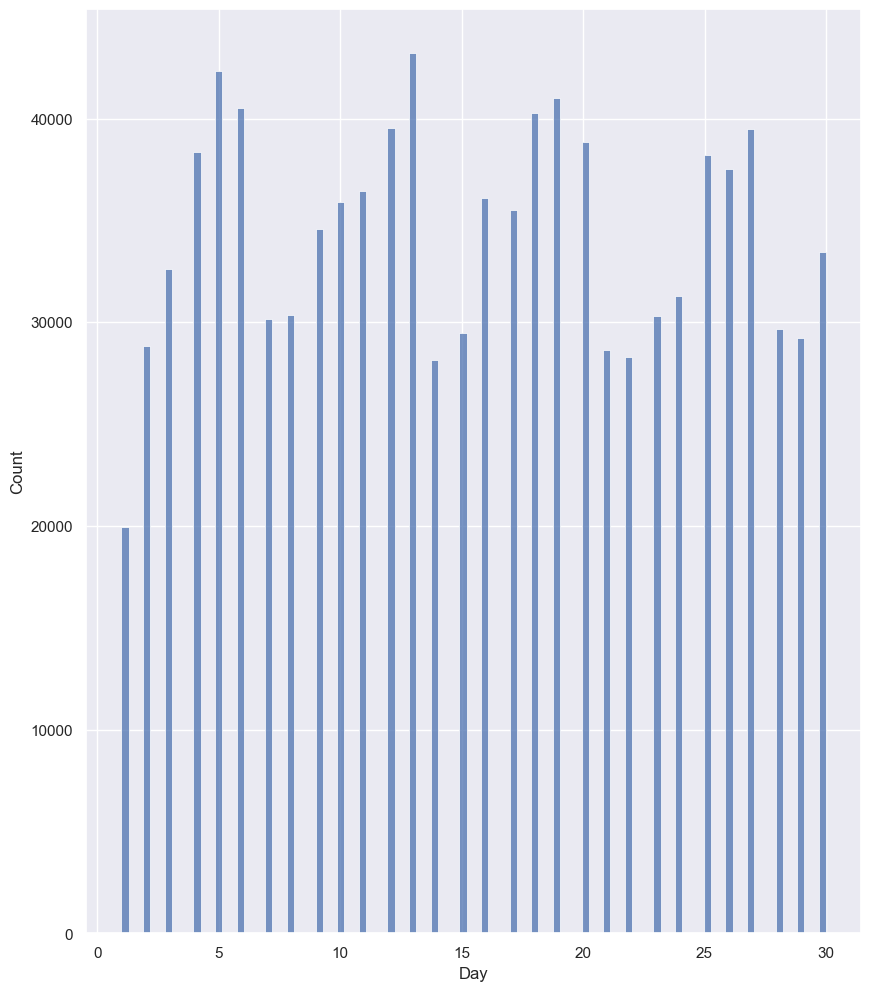

In [11]:
sns.set(rc={'figure.figsize':(10,12)})    #rc=Runtime Configuration
sns.histplot(u['Day'])                   #displot = Distribution plot("histogram")

 By looking at the daily trips we can say that the Uber trips are rising on the working days and decreases on the weekends.

#### 2) Uber trips according to the Hours:

<Axes: xlabel='Hour', ylabel='Count'>

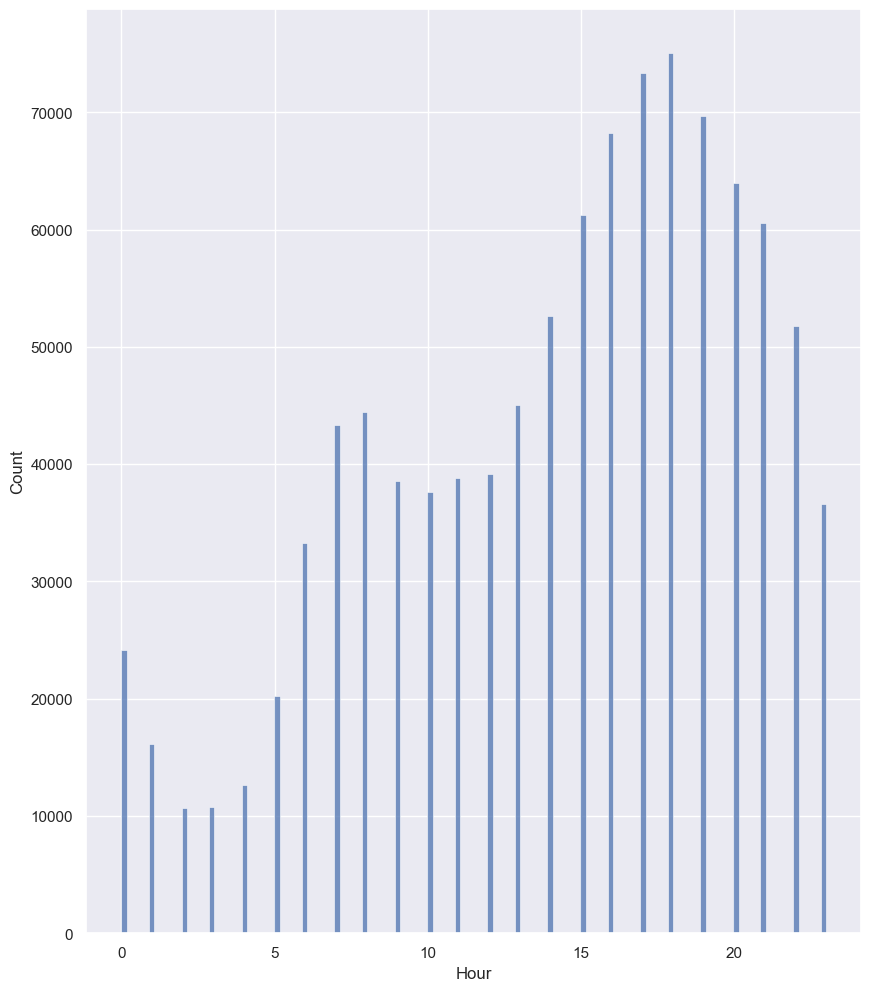

In [12]:
sns.histplot(u['Hour'])

According to the hourly data, the Uber trips decreases after midnight and then start increasing after 5 am and the trips keep rising till 6 pm(18) such that 6 pm is the busiest hour for Uber then the trips start decreasing. Now let’s analyze the Uber trips according to the weekdays.

#### 3) Uber trips according to the Weekday:

<Axes: xlabel='Weekday', ylabel='Count'>

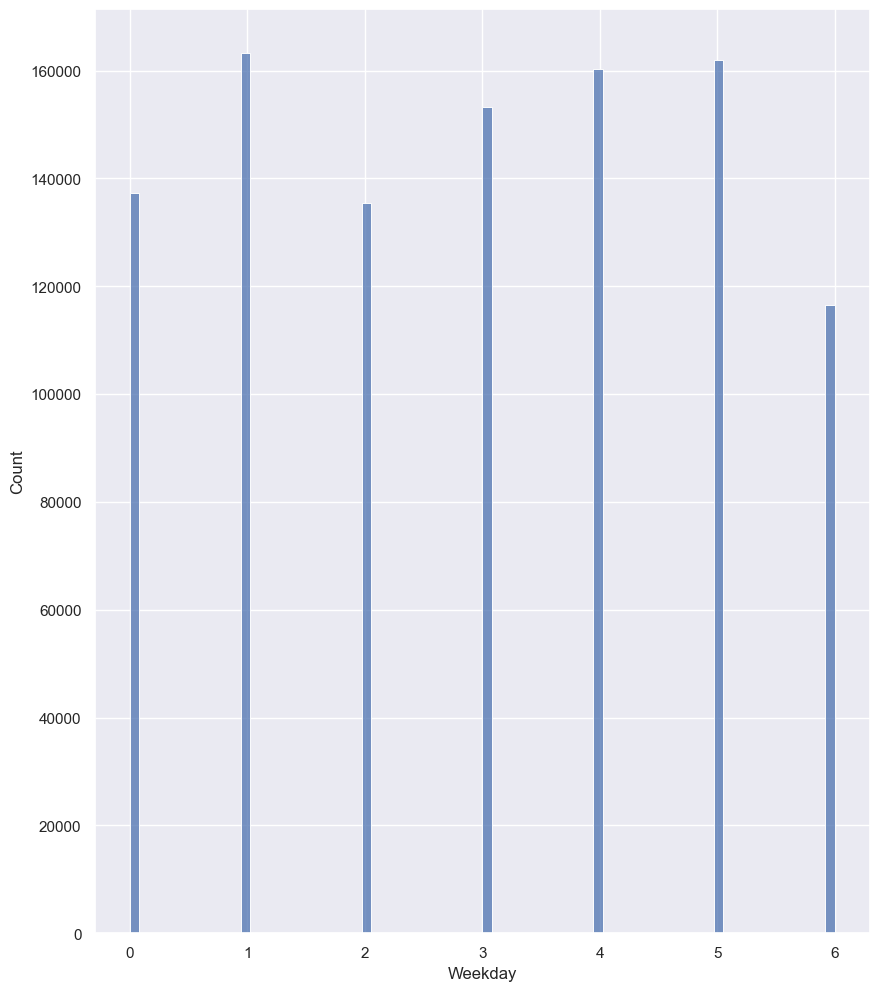

In [13]:
sns.histplot(u['Weekday'])

#### 4)Correlation of Weekday and Hour:

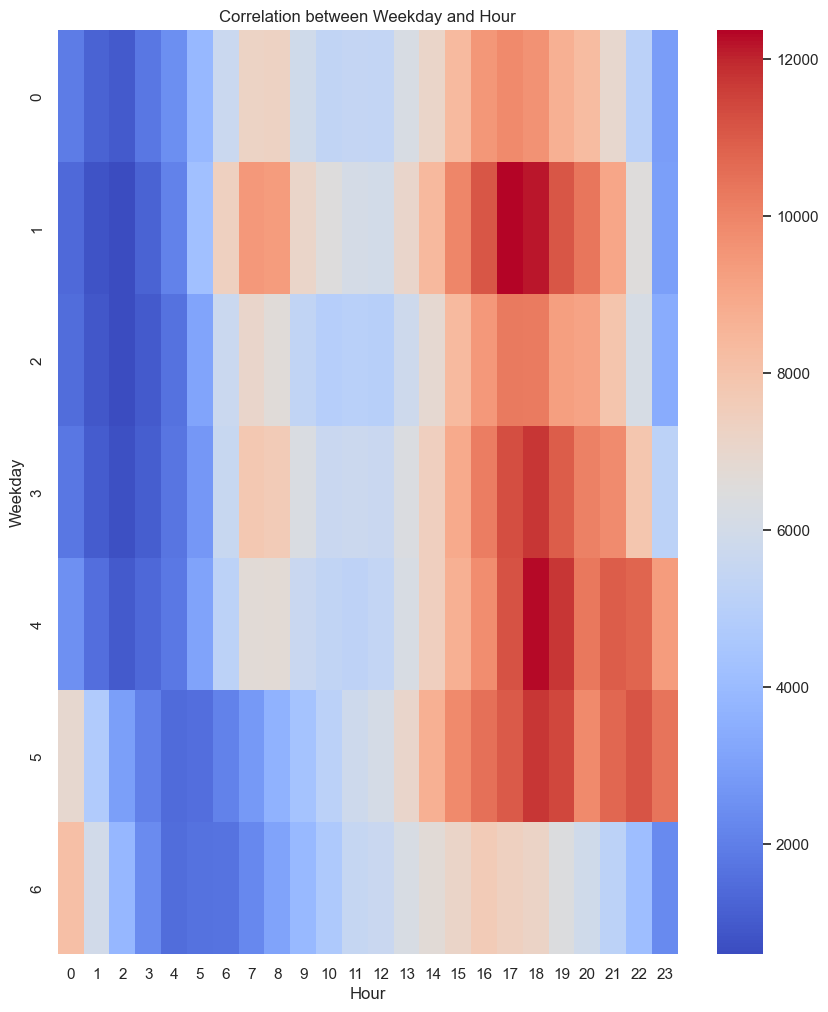

In [14]:
df = pd.DataFrame(u)
df = u.groupby(["Weekday", "Hour"]).apply(lambda x:len(x)) #This 
df = df.unstack()

#
#plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Weekday and Hour')
plt.show()

#### 5) As we are having the data about longitude and latitude so we can also plot the density of Uber trips according to the regions of the New Your city:

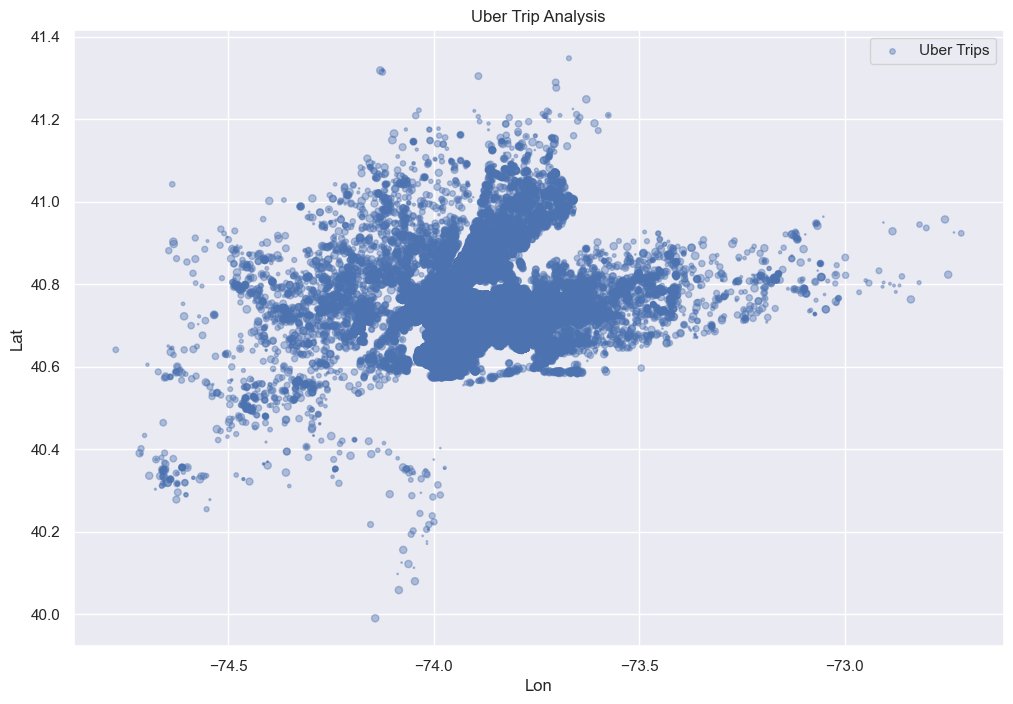

In [15]:
u.plot(kind='scatter', x='Lon', y='Lat',alpha=0.4,s=u['Day'],label='Uber Trips',
figsize=(12,8))
plt.title('Uber Trip Analysis')
plt.legend()
plt.show()

## Conclusion

So this is how we can analyze the Uber trips for New York City. Some of the conclusions that I got from this analysis are:
1) Monday is the most profitable day for Uber
2) On Saturdays less number of people use Uber
3) 6 pm is the busiest day for Uber
4) On average a rise in Uber trips start around 5 am.
5) Most of the Uber trips originate near the Manhattan region in New York.